In [1]:
%pip install torch


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Transformerの基礎と全体構造

## はじめに

Transformerは2017年にGoogleの研究者たちによって発表された画期的な深層学習モデルです。
このモデルは自然言語処理タスクで高い性能を発揮し、現在では多くの最先端モデルの基礎となっています。

この講義では、Transformerの基本的な構造と各コンポーネントの役割について学びます。

## Transformerの全体構造

Transformerは主に以下のコンポーネントから構成されています：

1. 入力埋め込み層
2. 位置エンコーディング
3. エンコーダ
4. デコーダ
5. 出力層

以下に、Transformerの全体構造を表す簡略化したクラスを実装します。

## コードの解説

1. `nn.Module`を継承して`Transformer`クラスを定義しています。

2. `__init__`メソッドで各コンポーネントを初期化しています：
   - `src_embed`と`tgt_embed`：入力と出力の埋め込み層
   - `positional_encoding`：位置エンコーディング（後の講義で実装）
   - `encoder`：TransformerEncoderLayer を num_encoder_layers 個積み重ねたもの
   - `decoder`：TransformerDecoderLayer を num_decoder_layers 個積み重ねたもの
   - `output_layer`：最終的な出力を生成する線形層

3. `forward`メソッドでモデルの順伝播を定義しています：
   - 入力を埋め込み層に通す
   - （位置エンコーディングを適用する - 後の講義で実装）
   - エンコーダに通す
   - デコーダに通す
   - 出力層で最終的な出力を生成

## パラメータの説明

- `src_vocab_size`：入力言語の語彙サイズ
- `tgt_vocab

In [3]:
import torch
import torch.nn as nn

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout):
        super(Transformer, self).__init__()
        
        # nn.Embedding: 単語をベクトル表現に変換する層
        # src_vocab_size: 入力言語の語彙サイズ
        # tgt_vocab_size: 出力言語の語彙サイズ
        # d_model: モデルの次元数（埋め込みの次元数）
        self.src_embed = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embed = nn.Embedding(tgt_vocab_size, d_model)
        
        # 位置エンコーディング（後の講義で実装）
        self.positional_encoding = None
        
        # nn.TransformerEncoderLayer: Transformerエンコーダの1層
        # TransformerEncoder: 複数のTransformerEncoderLayerを積み重ねたもの
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_encoder_layers)
        
        # nn.TransformerDecoderLayer: Transformerデコーダの1層
        # TransformerDecoder: 複数のTransformerDecoderLayerを積み重ねたもの
        decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_decoder_layers)
        
        # 出力層: デコーダの出力を語彙サイズに変換
        self.output_layer = nn.Linear(d_model, tgt_vocab_size)
        
    def forward(self, src, tgt):
        # 入力埋め込み
        src_embedded = self.src_embed(src)
        tgt_embedded = self.tgt_embed(tgt)
        
        # 位置エンコーディングの適用（後の講義で実装）
        # src_embedded = self.positional_encoding(src_embedded)
        # tgt_embedded = self.positional_encoding(tgt_embedded)
        
        # エンコーダ: 入力シーケンスを高次元の特徴表現に変換
        encoder_output = self.encoder(src_embedded)
        
        # デコーダ: エンコーダの出力を利用して、出力シーケンスを生成
        decoder_output = self.decoder(tgt_embedded, encoder_output)
        
        # 出力層: デコーダの出力を語彙サイズに変換
        output = self.output_layer(decoder_output)
        
        return output

# nn.Module: PyTorchの全てのニューラルネットワークモジュールの基本クラス
# Transformerクラスはnn.Moduleを継承することで、PyTorchの様々な機能（パラメータ管理、デバイス移動、保存と読み込みなど）を利用できる

# Transformerのインスタンス化例
src_vocab_size = 10000  # 入力言語の語彙サイズ
tgt_vocab_size = 10000  # 出力言語の語彙サイズ
d_model = 512  # モデルの次元数
nhead = 8  # マルチヘッドアテンションのヘッド数
num_encoder_layers = 6  # エンコーダ層の数
num_decoder_layers = 6  # デコーダ層の数
dim_feedforward = 2048  # フィードフォワードネットワークの中間層の次元数
dropout = 0.1  # ドロップアウト率

model = Transformer(src_vocab_size, tgt_vocab_size, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout)

# モデルの概要を表示
print(model)

Transformer(
  (src_embed): Embedding(10000, 512)
  (tgt_embed): Embedding(10000, 512)
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_feature

# 2. 埋め込み層の実装

## はじめに

埋め込み層（Embedding Layer）は、離散的な入力（例：単語）を連続的なベクトル表現に変換する役割を果たします。Transformerモデルでは、この層が入力テキストを処理する最初のステップとなります。

## 埋め込み層の役割

1. 語彙のインデックスを密なベクトルに変換
2. 単語間の意味的関係を捉える
3. モデルの入力次元を統一

## 実装

今回は、PyTorchの`nn.Embedding`を使用して埋め込み層を実装し、さらにその出力を指定の次元にスケーリングします。

## コードの解説

1. `nn.Embedding`を使用して基本的な埋め込み層を作成
2. 埋め込みの出力を`sqrt(d_model)`でスケーリング
   - これは論文「Attention Is All You Need」で提案された方法で、勾配を安定させる効果があります
3. `forward`メソッドで入力を埋め込みベクトルに変換

## 注意点

- 埋め込み層の重みは学習可能なパラメータです
- 語彙サイズが大きい場合、この層のパラメータ数が多くなる可能性があります

次のコードで、埋め込み層を実装します。

In [7]:
import torch
import torch.nn as nn
import math

class Embedding(nn.Module):
    def __init__(self, vocab_size, d_model):
        super(Embedding, self).__init__()
        
        # nn.Embedding: 語彙のインデックスを密なベクトルに変換する層
        # vocab_size: 語彙サイズ
        # d_model: 埋め込みベクトルの次元数
        self.embedding = nn.Embedding(vocab_size, d_model)
        
        # d_model: モデルの次元数（埋め込みの次元数）
        self.d_model = d_model

    def forward(self, x):
        # x: 入力テンソル（単語のインデックス）
        
        # 埋め込み層を適用
        embedded = self.embedding(x)
        
        # 埋め込みをスケーリング
        # sqrt(d_model)でスケーリングすることで、勾配を安定させる効果がある
        return embedded * math.sqrt(self.d_model)

# 使用例
vocab_size = 10000  # 語彙サイズ
d_model = 512  # モデルの次元数

# 埋め込み層のインスタンス化
embed_layer = Embedding(vocab_size, d_model)

# サンプル入力（バッチサイズ2、シーケンス長5の単語インデックス）
sample_input = torch.LongTensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

# 埋め込み層を適用
output = embed_layer(sample_input)

print(f"入力シェイプ: {sample_input.shape}")
print(f"出力シェイプ: {output.shape}")
print(f"出力の一部:\n{output[0][0][:10]}")  # 最初の単語の埋め込みベクトルの最初の10要素を表示

# モデルの概要を表示
print(embed_layer)

  Using cached pandas-2.2.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.2-cp312-cp312-macosx_10_9_x86_64.whl (12.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 7.2 MB/s eta 0:00:00a 0:00:01
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
入力シェイプ: torch.Size([2, 5])
出力シェイプ: torch.Size([2, 5, 512])
出力の一部:
tensor([ -5.7104,  21.6745,  -7.5315,  -8.5696, -16.6816,  22.4681,  -6.0961,
          2.1844,  -3.8150, -11.1368], grad_fn=<SliceBackward0>)
Embedding(
  (embedding): Embedding(10000, 512)
)


# 3. 位置エンコーディングの実装

## はじめに

位置エンコーディング（Positional Encoding）は、Transformerモデルにおいて非常に重要な役割を果たします。自己注意機構自体は入力シーケンスの順序情報を持たないため、位置エンコーディングによってシーケンス内の各要素の位置情報をモデルに与えます。

## 位置エンコーディングの役割

1. シーケンス内の各要素に位置情報を付加
2. モデルが入力の順序を考慮できるようにする
3. 異なる長さの入力に対応可能

## 実装

今回は、論文「Attention Is All You Need」で提案された正弦波ベースの位置エンコーディングを実装します。この方法は、以下の特徴を持ちます：

- 学習不要のパラメータ
- 異なる長さの入力に対応可能
- 相対的な位置関係を捉えやすい

## 数式

位置 $$pos$$ と次元 $$i$$ に対する位置エンコーディング $$PE$$ は以下のように定義されます：

$$PE_{(pos,2i)} = \sin(pos / 10000^{2i/d_{model}})$$
$$PE_{(pos,2i+1)} = \cos(pos / 10000^{2i/d_{model}})$$

ここで、$$d_{model}$$ はモデルの次元数です。

## コードの解説

1. `PositionalEncoding`クラスを定義
2. 初期化時に位置エンコーディングのテーブルを計算
3. `forward`メソッドで入力テンソルに位置エンコーディングを加算

## 注意点

- 位置エンコーディングは入力埋め込みと同じ次元数を持つ
- 入力シーケンスの最大長を超える位置エンコーディングが必要な場合は、テーブルを拡張する必要がある

次のコードで、位置エンコーディングを実装します。

In [8]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


入力シェイプ: torch.Size([2, 10, 512])
出力シェイプ: torch.Size([2, 10, 512])
位置エンコーディングの一部:
tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [ 0.8415,  0.5403,  0.8219,  0.5697,  0.8020],
        [ 0.9093, -0.4161,  0.9364, -0.3509,  0.9581],
        [ 0.1411, -0.9900,  0.2451, -0.9695,  0.3428],
        [-0.7568, -0.6536, -0.6572, -0.7537, -0.5486]])
PositionalEncoding()


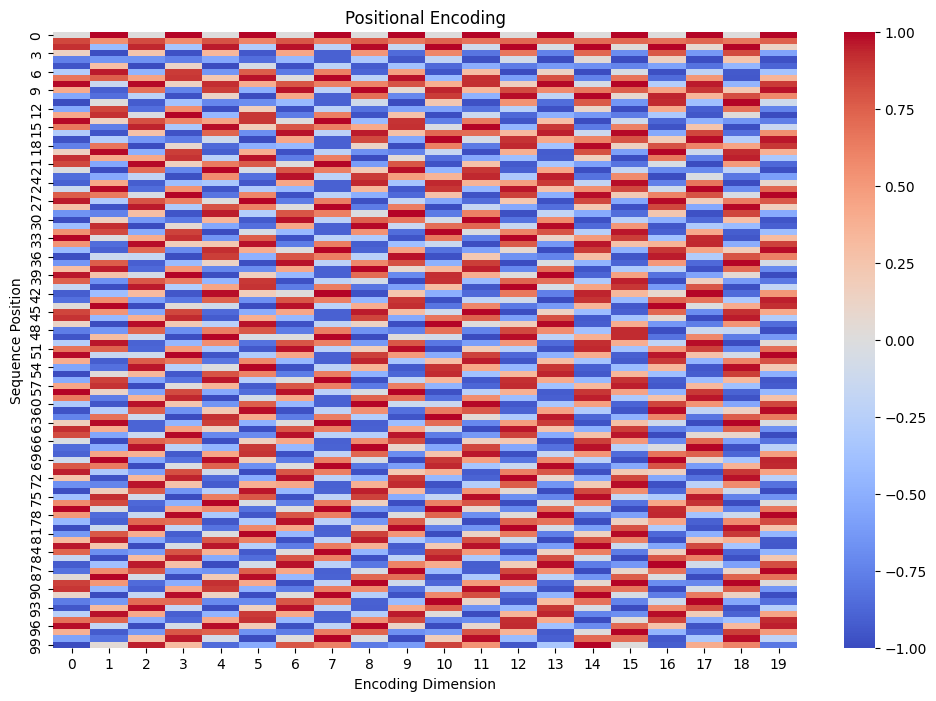

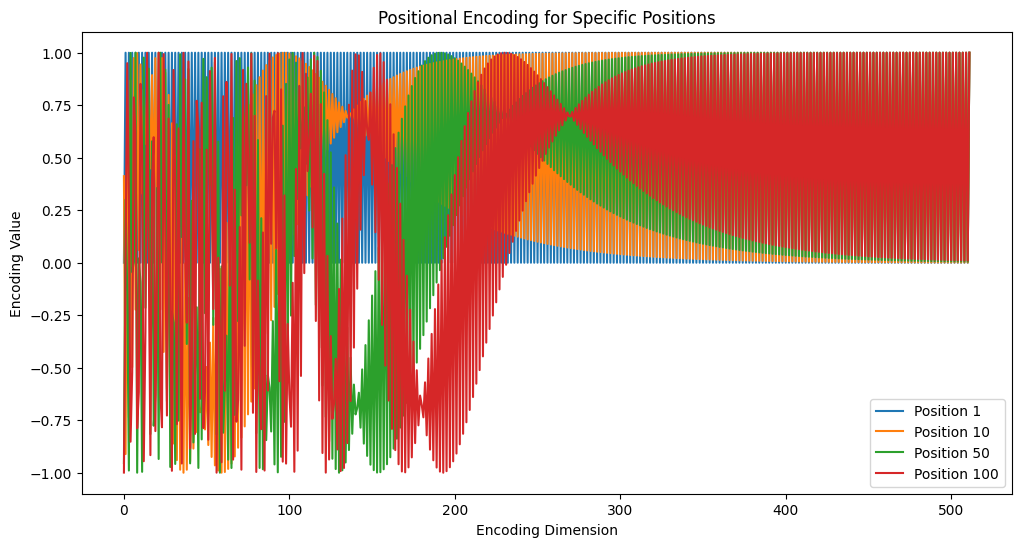

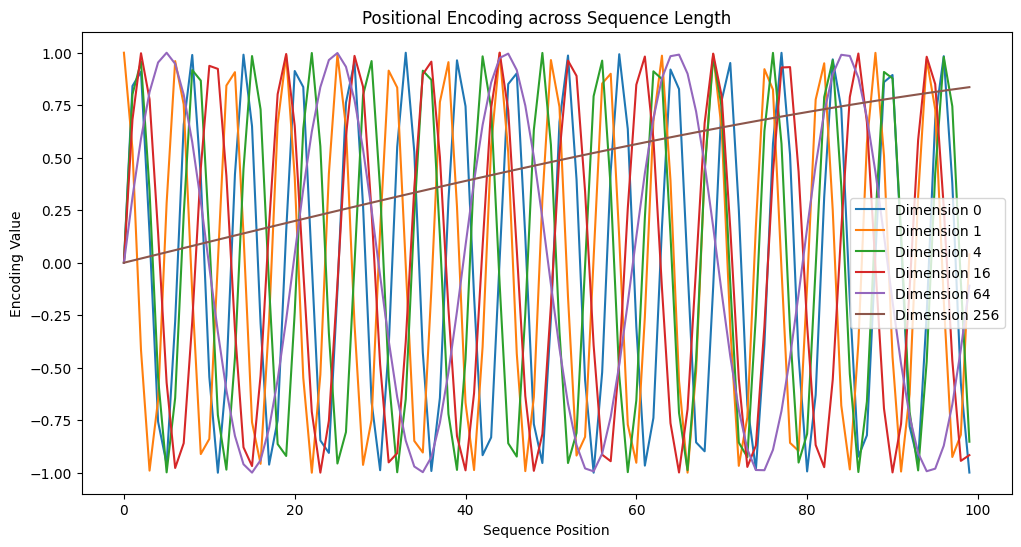

In [12]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import seaborn as sns

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        
        # d_model: モデルの次元数
        # max_len: 想定する最大シーケンス長
        
        # torch.zeros: 指定されたサイズの全ての要素が0のテンソルを作成
        # (1, max_len, d_model)の形状の位置エンコーディングを保存するバッファを作成
        pe = torch.zeros(1, max_len, d_model)
        
        # torch.arange: 指定された範囲の等間隔の1次元テンソルを作成
        # 0からmax_len-1までの数値を生成し、float型に変換
        # unsqueeze(1): テンソルの2次元目に次元を追加し、(max_len, 1)の形状にする
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        
        # 分母の計算
        # 数学的に、これは PE(pos,2i) = sin(pos / 10000^(2i/d_model)) の 1/10000^(2i/d_model) 部分を計算している
        # torch.arange(0, d_model, 2): 0からd_model-1まで2刻みで数値を生成（2iに相当）
        # torch.exp: 指数関数を計算
        # (-math.log(10000.0) / d_model): スケーリング係数
        #
        # この計算方法には以下の利点がある：
        # 1. オーバーフロー/アンダーフローの防止: 大きな値や小さな値でも安定して計算できる
        # 2. 計算精度の向上: 対数を使用することで、乗算を加算に変換し、丸め誤差の蓄積を減らす
        # 3. 計算効率: exp関数とlog関数は多くのシステムで高度に最適化されている
        # 4. 数値的安定性: 中間計算での桁落ちを防ぐ
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        # 正弦波の位置エンコーディングを計算
        # pe[0, :, 0::2]: peの1次元目の全て、3次元目の偶数インデックスを選択
        # torch.sin: 正弦関数を計算
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        
        # register_buffer: モデルのパラメータではないが、保存と読み込みが必要なテンソルを登録
        # これにより、位置エンコーディングは学習されないパラメータとして扱われる
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: 入力テンソル (batch_size, seq_len, d_model)
        
        # 入力に位置エンコーディングを加算
        # self.pe[:, :x.size(1), :]: 保存された位置エンコーディングから
        # 入力シーケンスの長さに合わせてスライス
        # この加算により、各位置に固有の情報が付加される
        return x + self.pe[:, :x.size(1), :]

# 使用例
d_model = 512  # モデルの次元数
max_len = 100  # 最大シーケンス長

# 位置エンコーディング層のインスタンス化
pos_encoder = PositionalEncoding(d_model, max_len)

# torch.randn: 指定されたサイズの標準正規分布に従う乱数テンソルを生成
# サンプル入力（バッチサイズ2、シーケンス長10、次元512の埋め込みベクトル）
sample_input = torch.randn(2, 10, d_model)

# 位置エンコーディングを適用
output = pos_encoder(sample_input)

print(f"入力シェイプ: {sample_input.shape}")
print(f"出力シェイプ: {output.shape}")
# pos_encoder.pe[0, :5, :5]: 位置エンコーディングの最初の5位置、5次元を表示
print(f"位置エンコーディングの一部:\n{pos_encoder.pe[0, :5, :5]}")

# モデルの概要を表示
print(pos_encoder)

# 位置エンコーディングの可視化
plt.figure(figsize=(12, 8))
sns.heatmap(pos_encoder.pe.squeeze().numpy()[:100, :20], cmap='coolwarm', center=0)
plt.title('Positional Encoding')
plt.xlabel('Encoding Dimension')
plt.ylabel('Sequence Position')
plt.show()

# 特定の位置のエンコーディングを可視化
positions_to_plot = [1, 10, 50, 100]
plt.figure(figsize=(12, 6))
for pos in positions_to_plot:
    plt.plot(pos_encoder.pe[0, pos-1, :].numpy(), label=f'Position {pos}')
plt.legend()
plt.title('Positional Encoding for Specific Positions')
plt.xlabel('Encoding Dimension')
plt.ylabel('Encoding Value')
plt.show()

# 特定の次元のエンコーディングを可視化
dimensions_to_plot = [0, 1, 4, 16, 64, 256]
plt.figure(figsize=(12, 6))
for dim in dimensions_to_plot:
    plt.plot(pos_encoder.pe[0, :100, dim].numpy(), label=f'Dimension {dim}')
plt.legend()
plt.title('Positional Encoding across Sequence Length')
plt.xlabel('Sequence Position')
plt.ylabel('Encoding Value')
plt.show()

# 4. Multi-Head Attentionの実装

## はじめに

Multi-Head Attentionは、Transformerモデルの中核をなす機構です。この仕組みにより、モデルは入力シーケンスの異なる部分に同時に注目することができ、より豊かな特徴表現を学習することが可能になります。

## Multi-Head Attentionの概要

1. 複数の「ヘッド」を使用して並列に注意機構を適用
2. 各ヘッドは独立して学習され、異なる特徴に注目する可能性がある
3. 最終的に各ヘッドの出力を結合し、線形変換を適用

## 実装のステップ

1. 入力をQuery, Key, Valueに変換
2. 各ヘッドに対して注意機構を適用
3. 各ヘッドの結果を結合
4. 最終的な線形変換を適用

## 数式

注意機構の計算は以下の式で表されます：

Attention(Q, K, V) = softmax((QK^T) / sqrt(d_k))V

ここで、Q, K, Vはそれぞれクエリ、キー、バリューを表し、d_kはキーの次元数です。

## コードの実装

以下のコードでMulti-Head Attentionを実装します。

入力シェイプ: torch.Size([2, 10, 512])
出力シェイプ: torch.Size([2, 10, 512])
注意確率シェイプ: torch.Size([2, 8, 10, 10])
MultiHeadAttention(
  (W_q): Linear(in_features=512, out_features=512, bias=True)
  (W_k): Linear(in_features=512, out_features=512, bias=True)
  (W_v): Linear(in_features=512, out_features=512, bias=True)
  (W_o): Linear(in_features=512, out_features=512, bias=True)
)


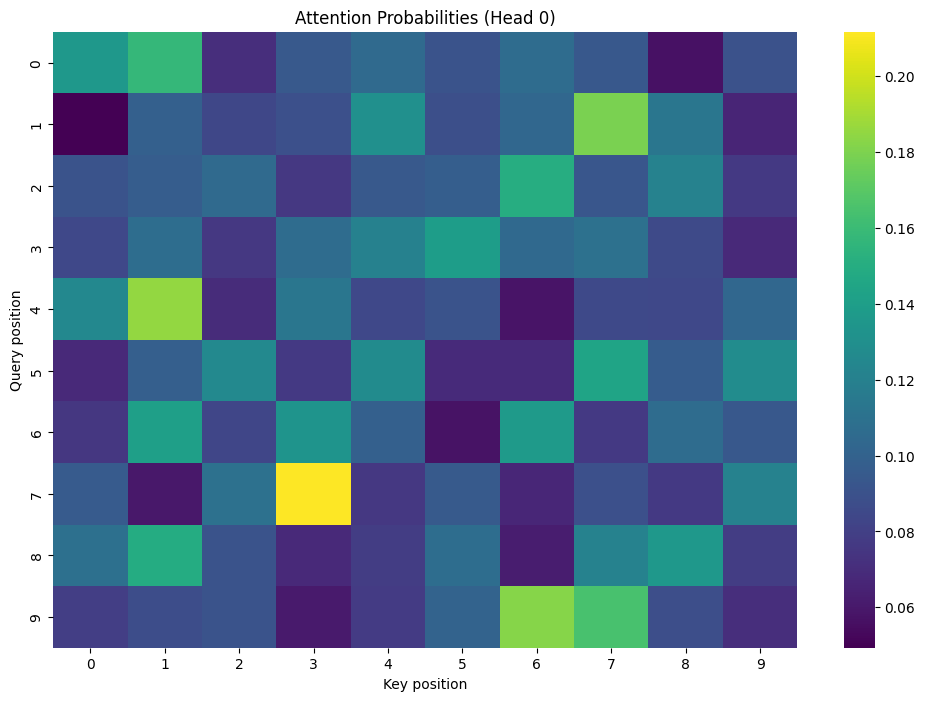

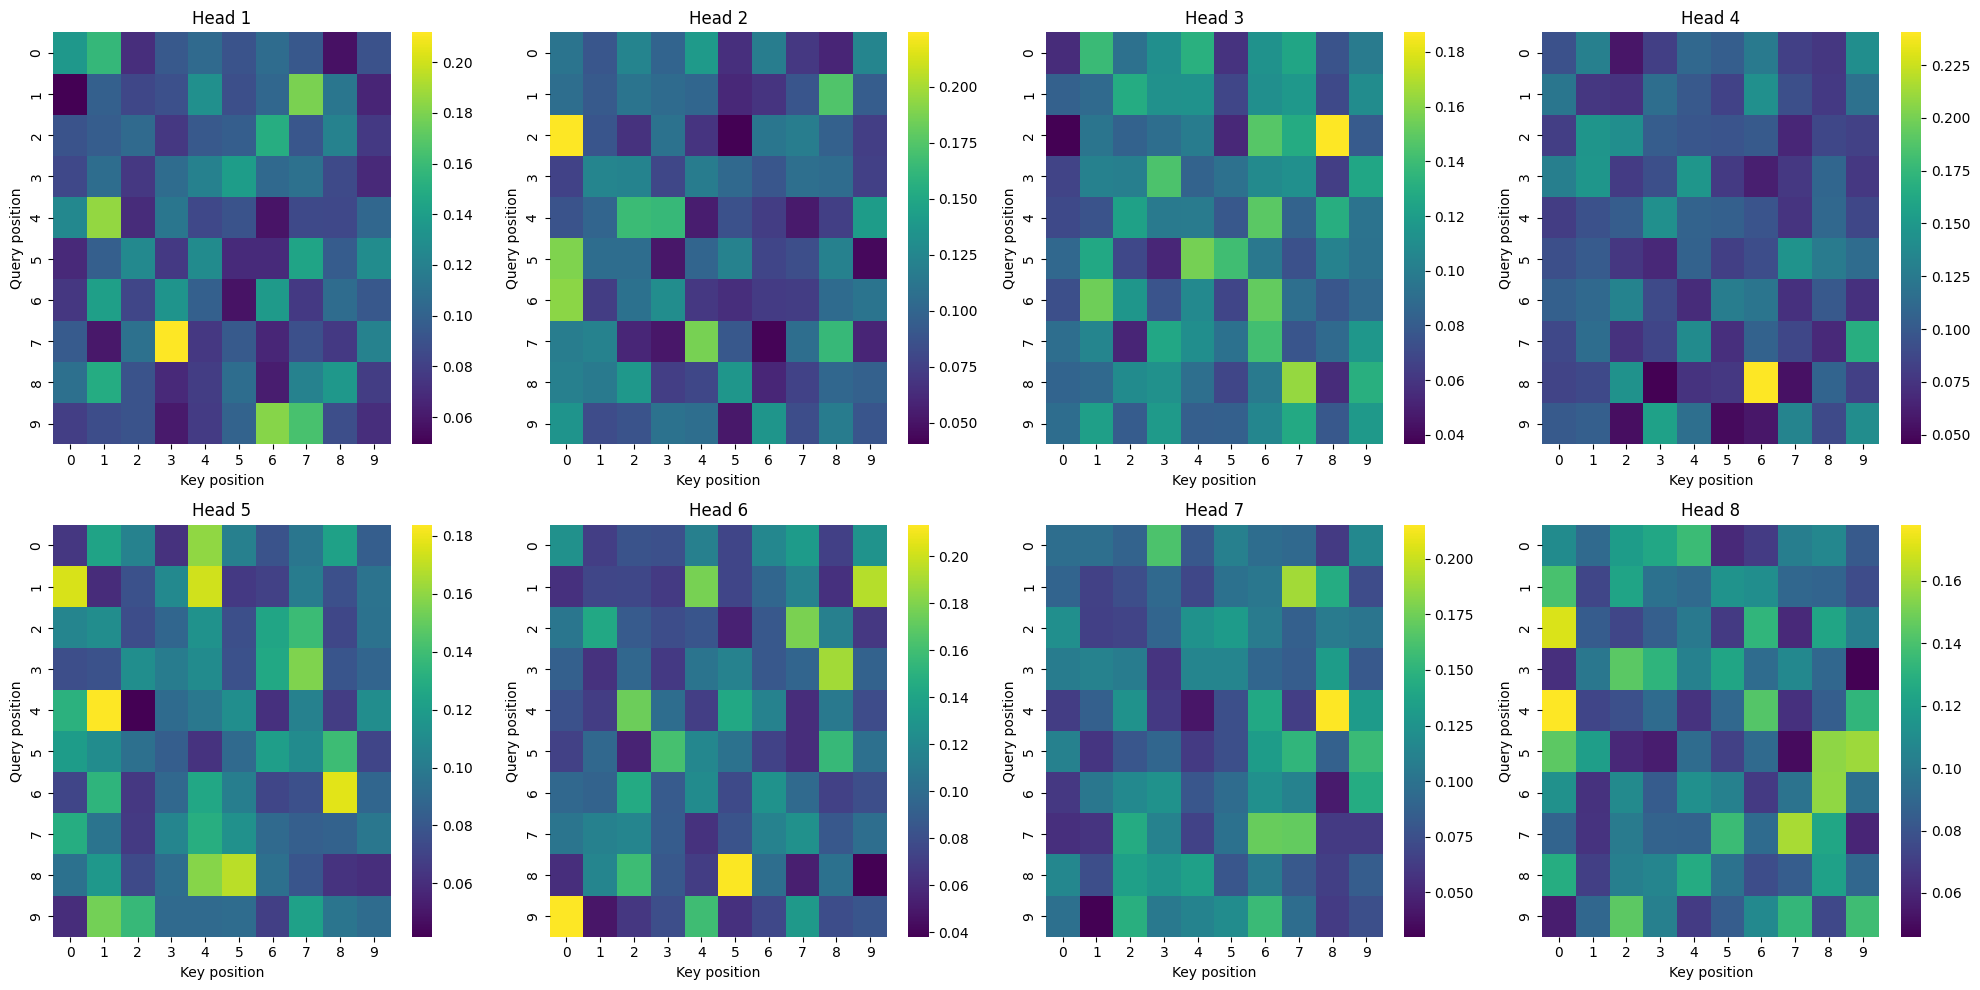

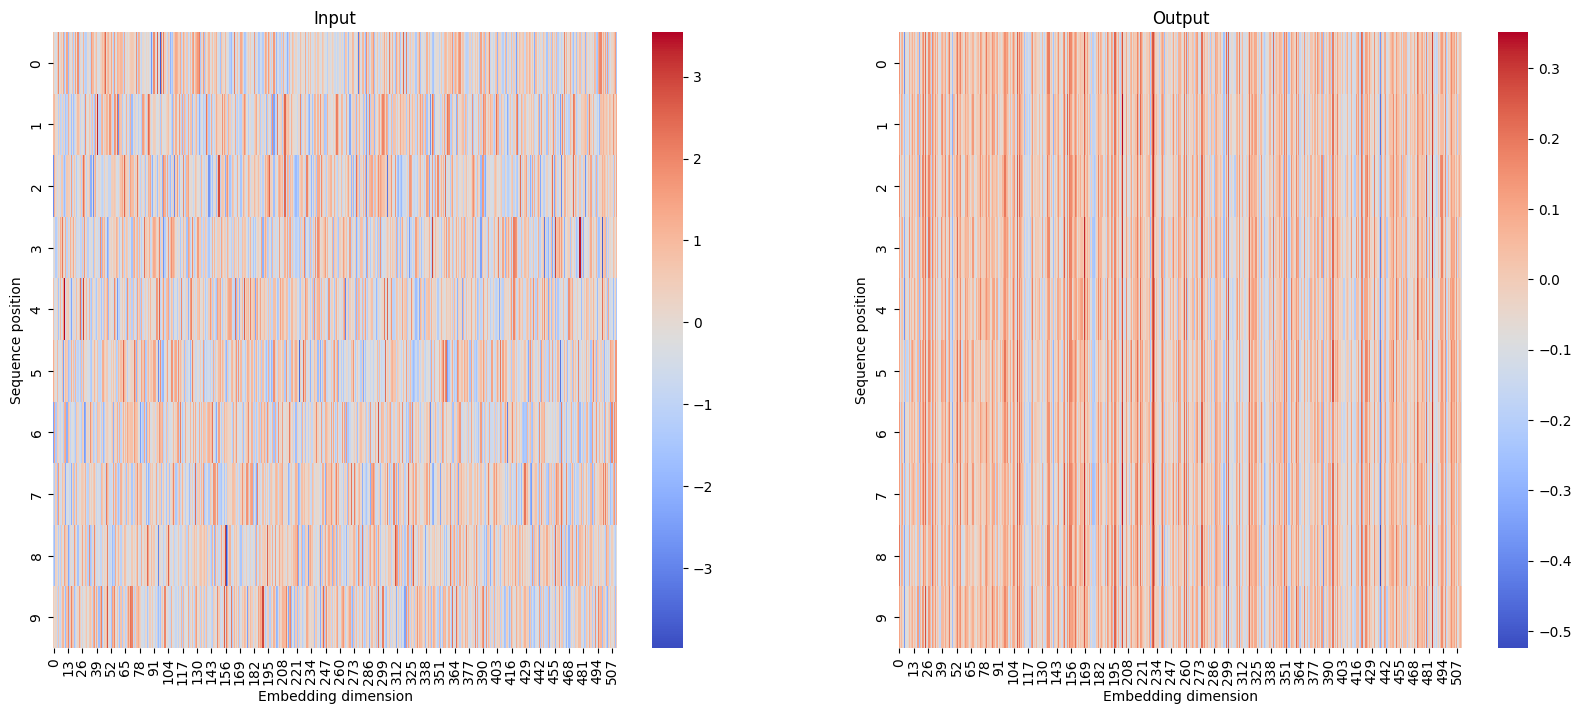

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        # Q, K, V: shape (batch_size, num_heads, seq_length, d_k)
        
        # matmul(Q, K.transpose(-2, -1))：最後の2次元でドット積を計算
        # K.transpose(-2, -1)：Kの最後の2次元を入れ替え (seq_length, d_k) -> (d_k, seq_length)
        attn_scores = torch.matmul(Q, K.transpose(-2, -1))
        
        # スケーリング：大きな値による極端なsoftmaxを避けるため
        attn_scores = attn_scores / math.sqrt(self.d_k)
        
        if mask is not None:
            # masked_fill：maskが0の位置を非常に小さな値（ここでは-1e9）で埋める
            # -1e9は事実上の負の無限大。softmax後にこの位置の確率が0に近くなる
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        
        # dim=-1：最後の次元（seq_length）に対してsoftmaxを適用
        attn_probs = F.softmax(attn_scores, dim=-1)
        
        # 重み付けされた値を計算
        output = torch.matmul(attn_probs, V)
        return output, attn_probs
        
    def split_heads(self, x):
        # x: shape (batch_size, seq_length, d_model)
        batch_size, seq_length, d_model = x.size()
        
        # reshape: (batch_size, seq_length, num_heads, d_k)
        x = x.view(batch_size, seq_length, self.num_heads, self.d_k)
        
        # transpose: (batch_size, num_heads, seq_length, d_k)
        # 1と2の次元を入れ替えて、num_headsを2番目の次元に
        return x.transpose(1, 2)
        
    def combine_heads(self, x):
        # x: shape (batch_size, num_heads, seq_length, d_k)
        batch_size, num_heads, seq_length, d_k = x.size()
        
        # transpose: (batch_size, seq_length, num_heads, d_k)
        x = x.transpose(1, 2)
        
        # reshape: (batch_size, seq_length, d_model)
        return x.contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        # Q, K, V: shape (batch_size, seq_length, d_model)
        
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output, attn_probs = self.scaled_dot_product_attention(Q, K, V, mask)
        
        output = self.W_o(self.combine_heads(attn_output))
        return output, attn_probs

# 使用例とビジュアライゼーション
d_model = 512
num_heads = 8
seq_length = 10
batch_size = 2

mha = MultiHeadAttention(d_model, num_heads)

# サンプル入力
q = torch.randn(batch_size, seq_length, d_model)
k = torch.randn(batch_size, seq_length, d_model)
v = torch.randn(batch_size, seq_length, d_model)

output, attn_probs = mha(q, k, v)
print(f"入力シェイプ: {q.shape}")
print(f"出力シェイプ: {output.shape}")
print(f"注意確率シェイプ: {attn_probs.shape}")

# モデルの概要を表示
print(mha)

# 注意確率のビジュアライゼーション
plt.figure(figsize=(12, 8))
sns.heatmap(attn_probs[0, 0].detach().numpy(), cmap='viridis')
plt.title('Attention Probabilities (Head 0)')
plt.xlabel('Key position')
plt.ylabel('Query position')
plt.show()

# 複数のヘッドの注意確率を可視化
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    sns.heatmap(attn_probs[0, i].detach().numpy(), ax=ax, cmap='viridis')
    ax.set_title(f'Head {i+1}')
    ax.set_xlabel('Key position')
    ax.set_ylabel('Query position')
plt.tight_layout()
plt.show()

# 入力と出力の比較
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(q[0].detach().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('Input')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Sequence position')
sns.heatmap(output[0].detach().numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('Output')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Sequence position')
plt.show()

# 5. Feed Forward Networkの実装

## はじめに

Feed Forward Network（FFN）は、Transformerモデルの各エンコーダ層とデコーダ層で使用される重要なコンポーネントです。Multi-Head Attentionの後に適用され、モデルに非線形性を導入し、表現力を高める役割を果たします。

## Feed Forward Networkの特徴

1. 2つの線形変換層と、その間のアクティベーション関数で構成されます。
2. 入力と出力の次元は同じですが、中間層の次元は通常大きくなります。
3. 位置ごとに独立して適用されます（つまり、シーケンスの各位置に同じFFNが適用されます）。

## 実装のステップ

1. 2つの線形層を定義します。
2. アクティベーション関数（通常はReLU）を適用します。
3. ドロップアウトを適用して過学習を防ぎます。

## 数式

FFNは以下の式で表されます：

FFN(x) = max(0, xW_1 + b_1)W_2 + b_2

ここで、W_1、W_2は重み行列、b_1、b_2はバイアス項、max(0, ...)はReLU活性化関数を表します。

## コードの実装

以下のコードでFeed Forward Networkを実装します。

入力シェイプ: torch.Size([2, 10, 512])
出力シェイプ: torch.Size([2, 10, 512])
FeedForwardNetwork(
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


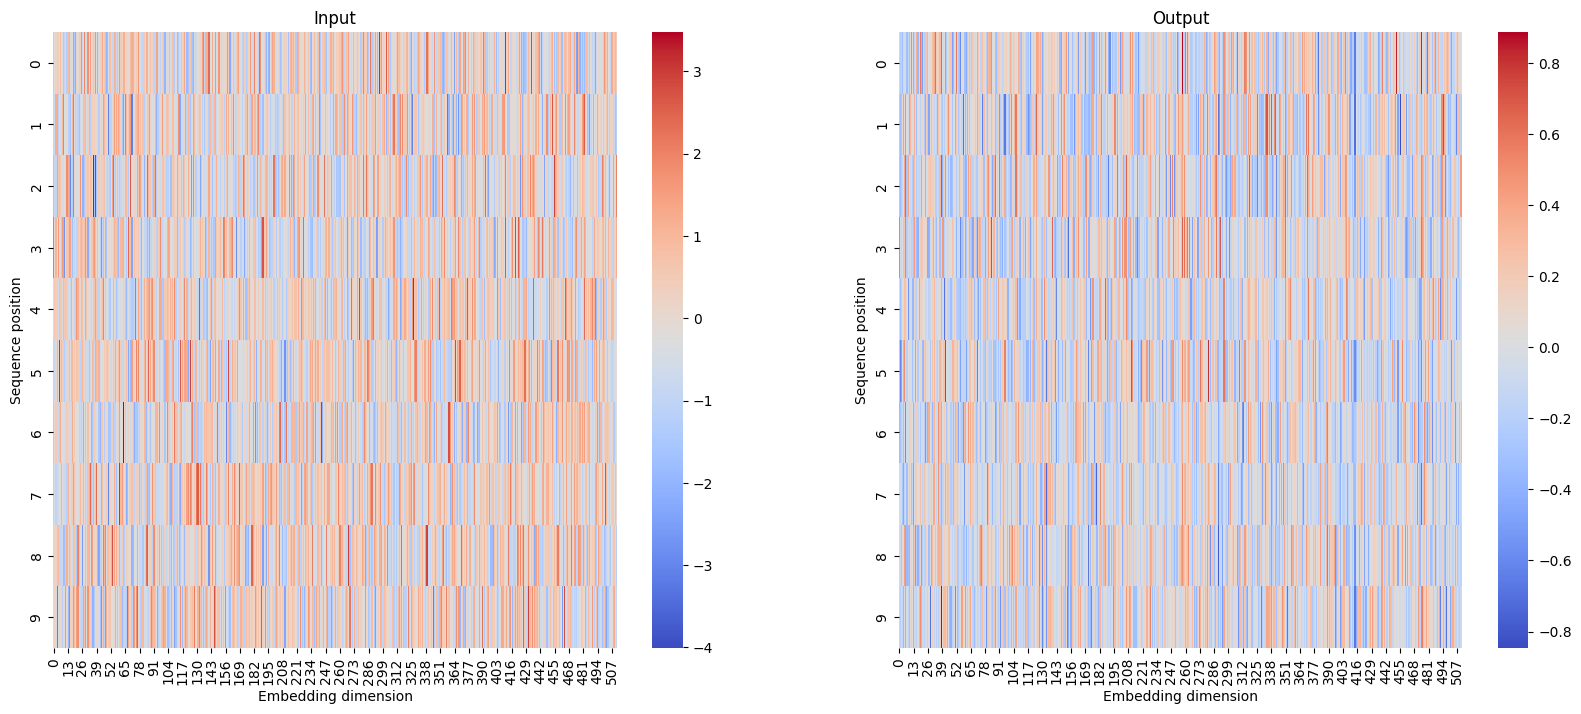

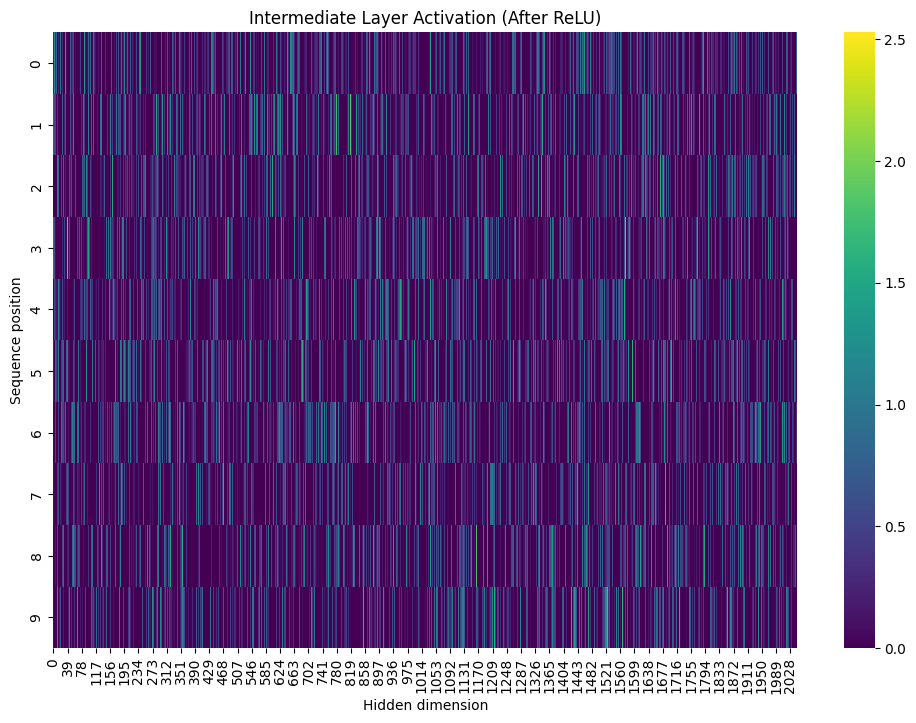

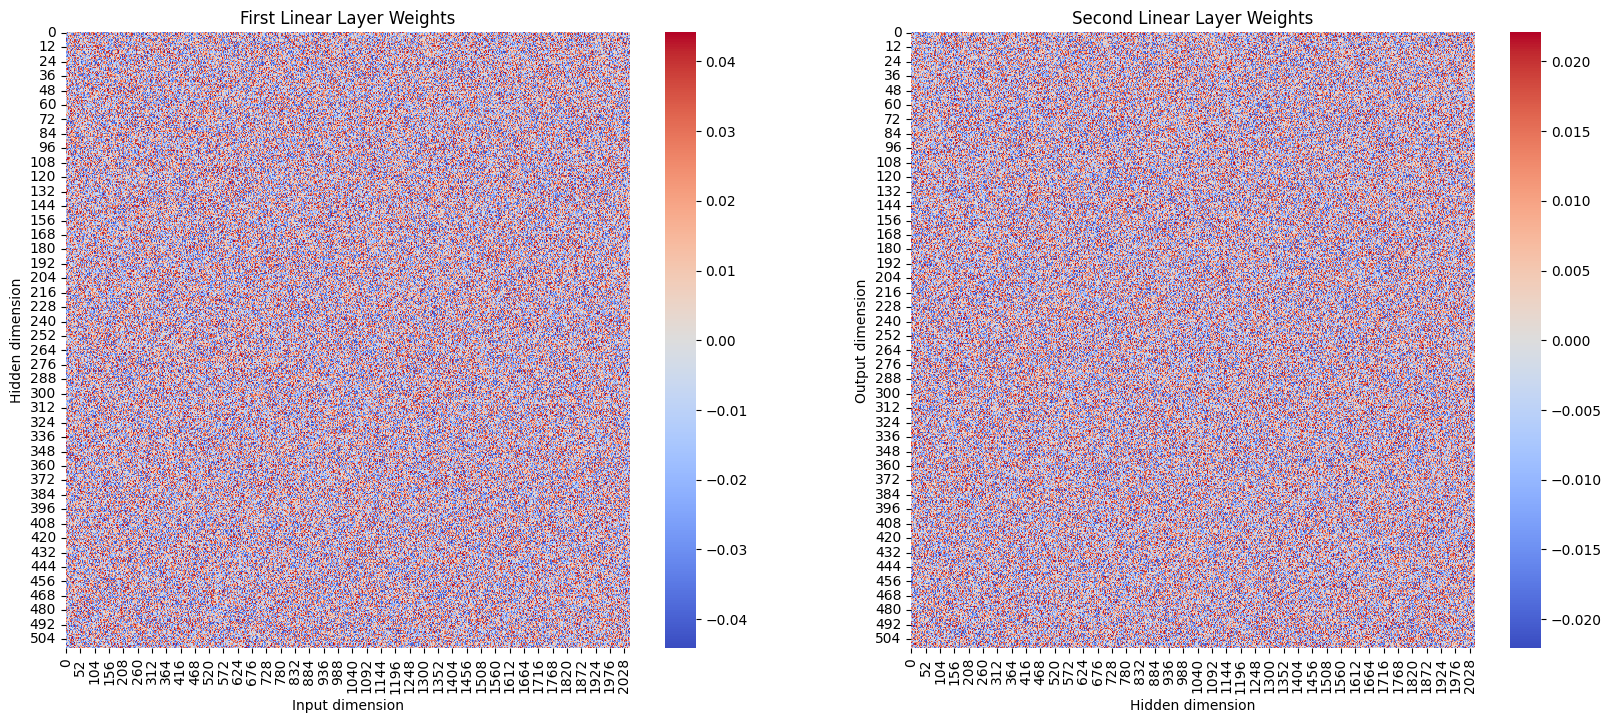

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

class FeedForwardNetwork(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(FeedForwardNetwork, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # ReLU (Rectified Linear Unit) 活性化関数を適用
        # ReLUを使用する理由:
        # 1. 勾配消失問題の軽減: 正の入力に対して勾配が常に1なので、深層ネットワークでも勾配が消失しにくい
        # 2. スパース化: 負の入力を0にすることで、モデルの表現をスパースにし、過学習を抑制
        # 3. 計算効率: max(0,x)という単純な操作なので、計算が高速
        x = F.relu(self.linear1(x))
        
        # ドロップアウトを適用
        # ドロップアウトを使用する理由:
        # 1. 過学習の防止: ランダムにニューロンを無効化することで、特定の特徴に過度に依存するのを防ぐ
        # 2. アンサンブル学習の効果: 異なるサブネットワークの組み合わせを学習することになり、汎化性能が向上
        # 3. ノイズへの耐性: 入力にノイズを加えるのと同様の効果があり、モデルの頑健性が向上
        x = self.dropout(x)
        
        x = self.linear2(x)
        return x

# 使用例とビジュアライゼーション
d_model = 512
d_ff = 2048
seq_length = 10
batch_size = 2

ffn = FeedForwardNetwork(d_model, d_ff)

# サンプル入力
input_tensor = torch.randn(batch_size, seq_length, d_model)

output = ffn(input_tensor)
print(f"入力シェイプ: {input_tensor.shape}")
print(f"出力シェイプ: {output.shape}")

# モデルの概要を表示
print(ffn)

# 入力と出力の比較可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(input_tensor[0].detach().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('Input')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Sequence position')
sns.heatmap(output[0].detach().numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('Output')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Sequence position')
plt.show()

# 中間層の活性化を可視化
with torch.no_grad():
    intermediate = F.relu(ffn.linear1(input_tensor))

plt.figure(figsize=(12, 8))
sns.heatmap(intermediate[0].detach().numpy(), cmap='viridis')
plt.title('Intermediate Layer Activation (After ReLU)')
plt.xlabel('Hidden dimension')
plt.ylabel('Sequence position')
plt.show()

# 重み行列の可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(ffn.linear1.weight.data.t().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('First Linear Layer Weights')
ax1.set_xlabel('Input dimension')
ax1.set_ylabel('Hidden dimension')
sns.heatmap(ffn.linear2.weight.data.numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('Second Linear Layer Weights')
ax2.set_xlabel('Hidden dimension')
ax2.set_ylabel('Output dimension')
plt.show()

# 6. エンコーダ層の実装

## はじめに

Transformerのエンコーダ層は、Multi-Head Attentionと Feed Forward Networkの2つの主要なサブレイヤーで構成されています。これらのサブレイヤーの周りには、Layer Normalizationと残差接続（Residual Connection）が適用されます。

## エンコーダ層の構造

1. Multi-Head Attention
2. Add & Norm (残差接続とLayer Normalization)
3. Feed Forward Network
4. Add & Norm (残差接続とLayer Normalization)

## 実装のステップ

1. Multi-Head Attentionの実装
2. Feed Forward Networkの実装
3. Layer Normalizationの適用
4. 残差接続の実装
5. これらのコンポーネントを組み合わせてエンコーダ層を構築

## 重要な概念

- 残差接続：勾配消失問題を軽減し、より深いネットワークの学習を可能にします。
- Layer Normalization：各レイヤーの出力を正規化し、学習の安定性を向上させます。

## コードの実装

以下のコードでTransformerのエンコーダ層を実装します。

入力シェイプ: torch.Size([2, 10, 512])
出力シェイプ: torch.Size([2, 10, 512])
EncoderLayer(
  (self_attn): MultiHeadAttention(
    (W_q): Linear(in_features=512, out_features=512, bias=True)
    (W_k): Linear(in_features=512, out_features=512, bias=True)
    (W_v): Linear(in_features=512, out_features=512, bias=True)
    (W_o): Linear(in_features=512, out_features=512, bias=True)
  )
  (feed_forward): FeedForwardNetwork(
    (linear1): Linear(in_features=512, out_features=2048, bias=True)
    (linear2): Linear(in_features=2048, out_features=512, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


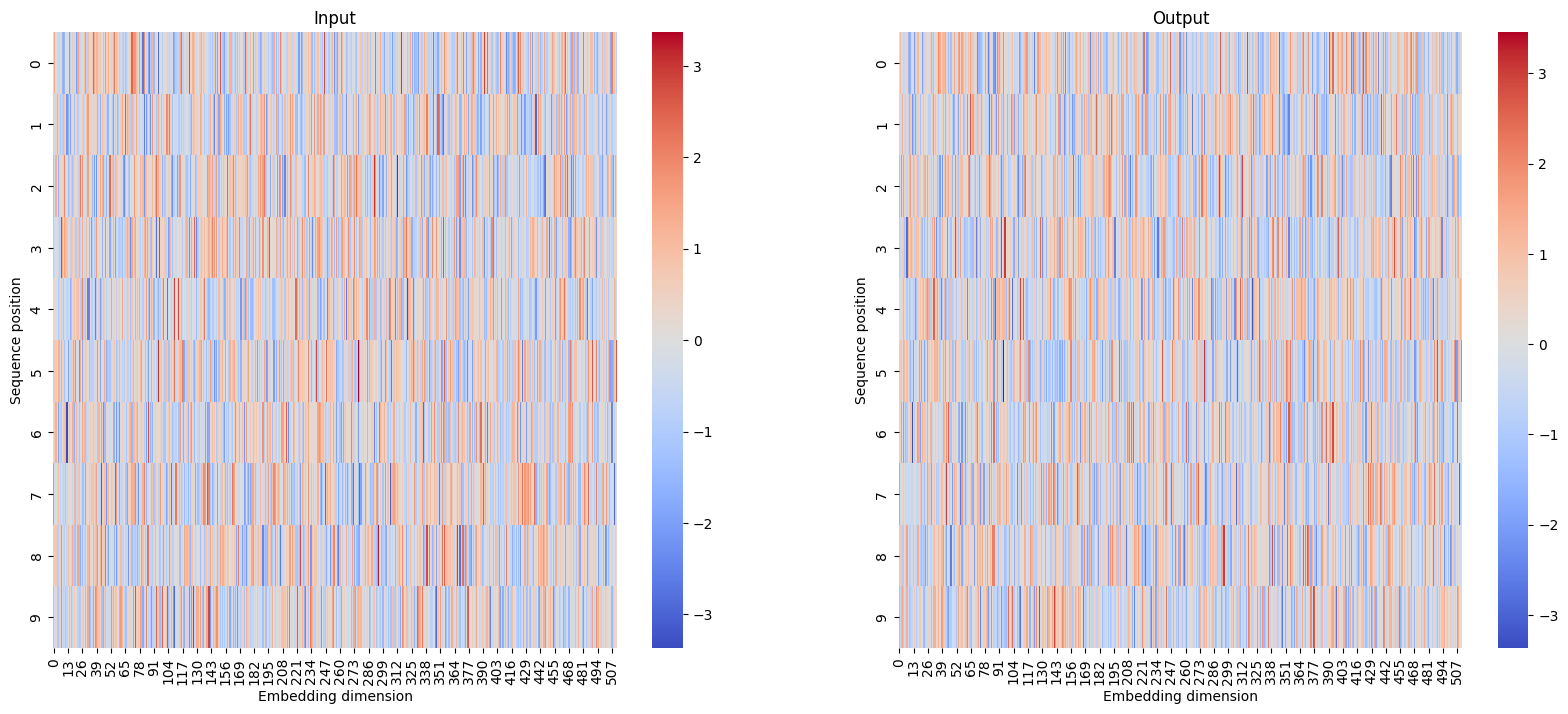

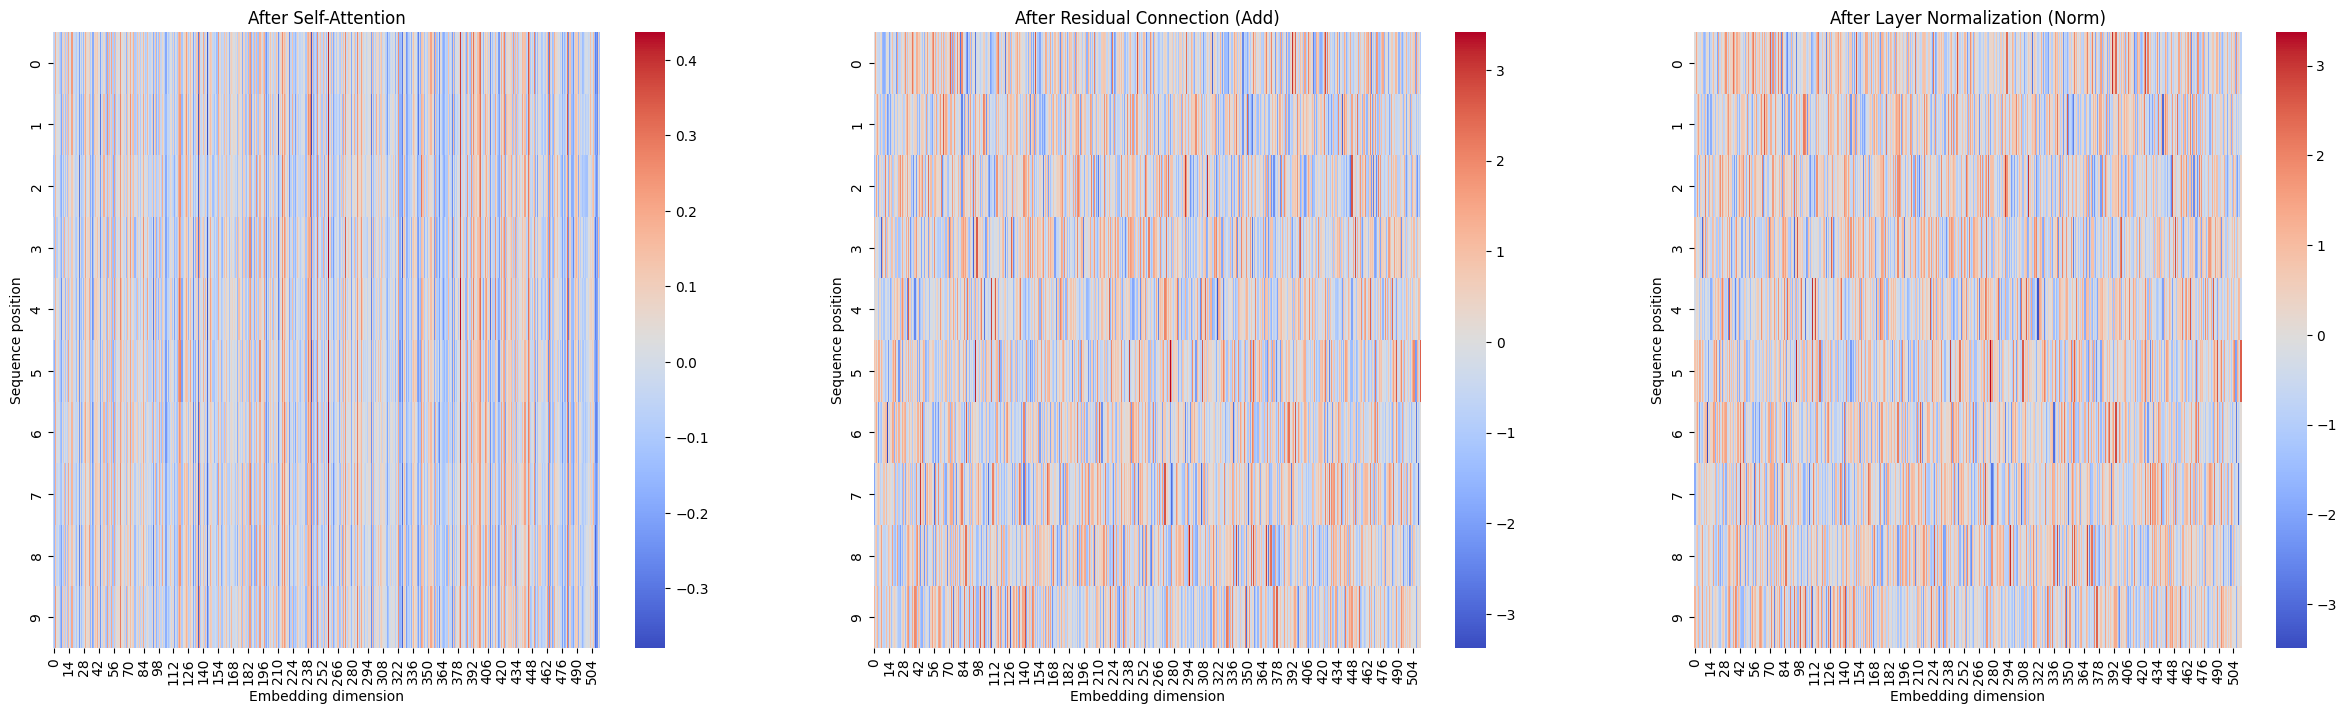

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = F.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

class FeedForwardNetwork(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(FeedForwardNetwork, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # ReLU活性化関数とドロップアウトを適用
        x = self.dropout(F.relu(self.linear1(x)))
        x = self.linear2(x)
        return x

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = FeedForwardNetwork(d_model, d_ff, dropout)
        
        # Layer Normalizationレイヤーを初期化
        # これらは各サブレイヤーの出力を正規化するために使用される
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        
        # ドロップアウトレイヤーを初期化
        # これは過学習を防ぐために使用される
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        # Self-Attention サブレイヤー
        attn_output, _ = self.self_attn(x, x, x, mask)
        
        # Add & Norm (残差接続とLayer Normalization)
        # 1. 残差接続: 入力xとSelf-Attentionの出力を足し合わせる
        #    これにより、勾配が直接的に下位層に伝わりやすくなり、勾配消失問題が緩和される
        # 2. Layer Normalization: 足し合わせた結果を正規化する
        #    これにより、データの分布が安定し、学習が容易になる
        x = self.norm1(x + self.dropout(attn_output))
        
        # Feed Forward サブレイヤー
        ff_output = self.feed_forward(x)
        
        # Add & Norm (残差接続とLayer Normalization)
        # Feed Forwardネットワークの出力に対しても同様の処理を行う
        x = self.norm2(x + self.dropout(ff_output))
        
        return x

# 使用例とビジュアライゼーション
d_model = 512
num_heads = 8
d_ff = 2048
seq_length = 10
batch_size = 2

encoder_layer = EncoderLayer(d_model, num_heads, d_ff)

# サンプル入力
input_tensor = torch.randn(batch_size, seq_length, d_model)

output = encoder_layer(input_tensor)
print(f"入力シェイプ: {input_tensor.shape}")
print(f"出力シェイプ: {output.shape}")

# モデルの概要を表示
print(encoder_layer)

# 入力と出力の比較可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(input_tensor[0].detach().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('Input')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Sequence position')
sns.heatmap(output[0].detach().numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('Output')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Sequence position')
plt.show()

# Layer Normalizationの効果を可視化
with torch.no_grad():
    # Self-Attentionの出力を取得
    attn_output = encoder_layer.self_attn(input_tensor, input_tensor, input_tensor)
    
    # 残差接続（Add）の結果を計算
    residual_output = input_tensor + attn_output
    
    # Layer Normalization（Norm）の結果を計算
    normalized_output = encoder_layer.norm1(residual_output)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
sns.heatmap(attn_output[0].detach().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('After Self-Attention')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Sequence position')
sns.heatmap(residual_output[0].detach().numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('After Residual Connection (Add)')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Sequence position')
sns.heatmap(normalized_output[0].detach().numpy(), ax=ax3, cmap='coolwarm')
ax3.set_title('After Layer Normalization (Norm)')
ax3.set_xlabel('Embedding dimension')
ax3.set_ylabel('Sequence position')
plt.show()

# 7. デコーダ層の実装

## はじめに

Transformerのデコーダ層は、エンコーダ層と似た構造を持ちますが、以下の重要な違いがあります：

1. マスクされた自己注意機構（Masked Self-Attention）
2. エンコーダ-デコーダ間の注意機構（Encoder-Decoder Attention）

これらの機構により、デコーダは過去の出力のみを参照しつつ、エンコーダからの情報を利用して次のトークンを生成することができます。

## デコーダ層の構造

1. Masked Multi-Head Attention
2. Add & Norm
3. Encoder-Decoder Multi-Head Attention
4. Add & Norm
5. Feed Forward Network
6. Add & Norm

## 実装のステップ

1. Masked Multi-Head Attentionの実装
2. Encoder-Decoder Multi-Head Attentionの実装
3. Feed Forward Networkの実装（エンコーダ層と同じ）
4. Layer Normalizationと残差接続の適用
5. これらのコンポーネントを組み合わせてデコーダ層を構築

## 重要な概念

- マスキング：未来の情報を参照しないようにするための技術
- クロスアテンション：エンコーダの出力を利用するための機構

## コードの実装

以下のコードでTransformerのデコーダ層を実装します。

入力シェイプ: torch.Size([2, 10, 512])
エンコーダ出力シェイプ: torch.Size([2, 10, 512])
デコーダ出力シェイプ: torch.Size([2, 10, 512])
DecoderLayer(
  (self_attn): MultiHeadAttention(
    (W_q): Linear(in_features=512, out_features=512, bias=True)
    (W_k): Linear(in_features=512, out_features=512, bias=True)
    (W_v): Linear(in_features=512, out_features=512, bias=True)
    (W_o): Linear(in_features=512, out_features=512, bias=True)
  )
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (enc_dec_attn): MultiHeadAttention(
    (W_q): Linear(in_features=512, out_features=512, bias=True)
    (W_k): Linear(in_features=512, out_features=512, bias=True)
    (W_v): Linear(in_features=512, out_features=512, bias=True)
    (W_o): Linear(in_features=512, out_features=512, bias=True)
  )
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (feed_forward): FeedForwardNetwork(
    (linear1): Linear(in_features=512, out_features=2048, bias=True)
    (linear2): Linear(in_features=2048, out_feat

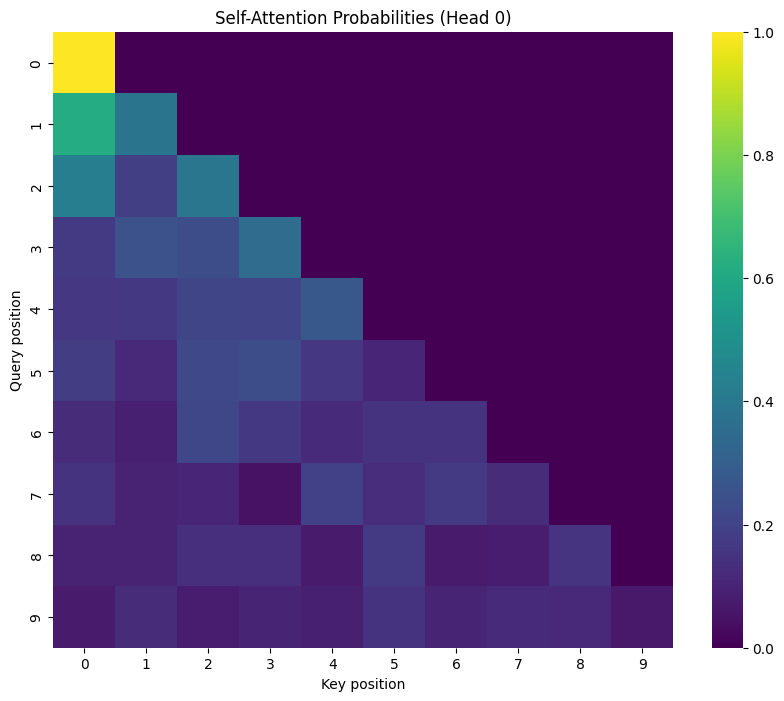

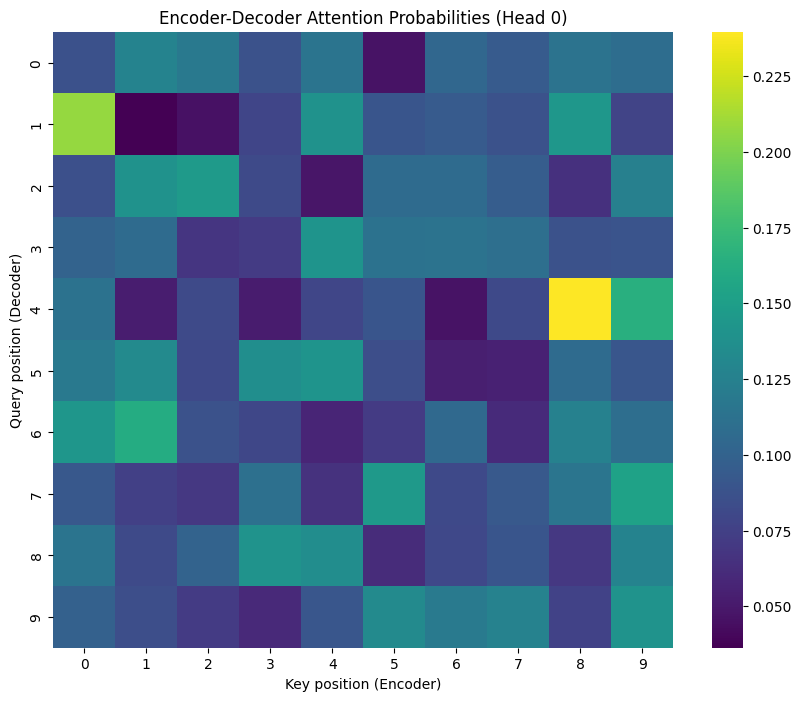

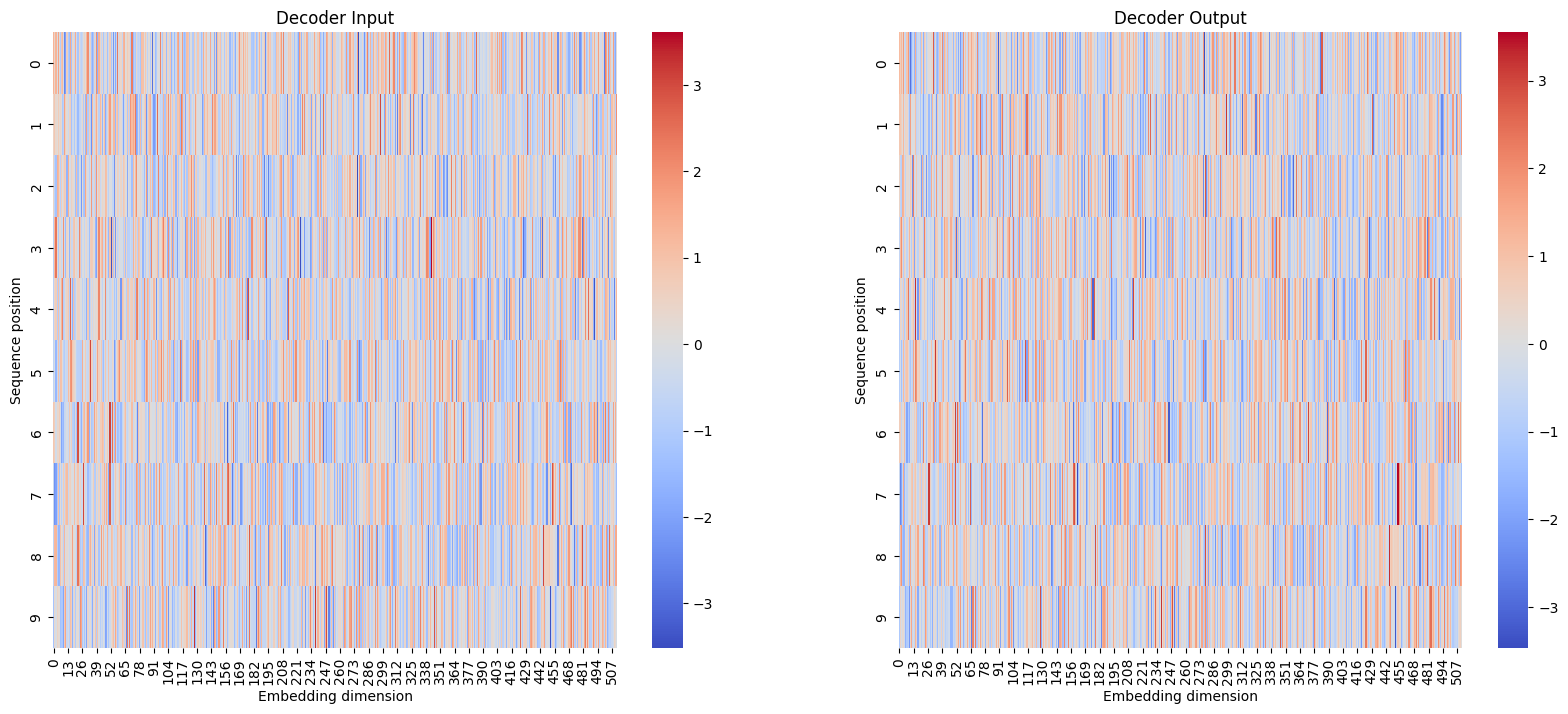

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = F.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output, attn_probs
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output, attn_probs = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output, attn_probs

class FeedForwardNetwork(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(FeedForwardNetwork, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.dropout(F.relu(self.linear1(x)))
        x = self.linear2(x)
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(DecoderLayer, self).__init__()
        
        # Masked Self-Attention
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        
        # Encoder-Decoder Attention
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)
        self.norm2 = nn.LayerNorm(d_model)
        
        # Feed Forward Network
        self.feed_forward = FeedForwardNetwork(d_model, d_ff, dropout)
        self.norm3 = nn.LayerNorm(d_model)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        # Masked Self-Attention
        attn_output, self_attn_probs = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        
        # Encoder-Decoder Attention
        attn_output, enc_dec_attn_probs = self.enc_dec_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        
        # Feed Forward Network
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        
        return x, self_attn_probs, enc_dec_attn_probs

# 使用例とビジュアライゼーション
d_model = 512
num_heads = 8
d_ff = 2048
seq_length = 10
batch_size = 2

decoder_layer = DecoderLayer(d_model, num_heads, d_ff)

# サンプル入力
decoder_input = torch.randn(batch_size, seq_length, d_model)
encoder_output = torch.randn(batch_size, seq_length, d_model)

# マスクの生成（上三角行列）
tgt_mask = torch.triu(torch.ones(seq_length, seq_length), diagonal=1).unsqueeze(0) == 0

output, self_attn_probs, enc_dec_attn_probs = decoder_layer(decoder_input, encoder_output, tgt_mask=tgt_mask)
print(f"入力シェイプ: {decoder_input.shape}")
print(f"エンコーダ出力シェイプ: {encoder_output.shape}")
print(f"デコーダ出力シェイプ: {output.shape}")

# モデルの概要を表示
print(decoder_layer)

# Self-Attentionの可視化
plt.figure(figsize=(10, 8))
sns.heatmap(self_attn_probs[0, 0].detach().numpy(), cmap='viridis')
plt.title('Self-Attention Probabilities (Head 0)')
plt.xlabel('Key position')
plt.ylabel('Query position')
plt.show()

# Encoder-Decoder Attentionの可視化
plt.figure(figsize=(10, 8))
sns.heatmap(enc_dec_attn_probs[0, 0].detach().numpy(), cmap='viridis')
plt.title('Encoder-Decoder Attention Probabilities (Head 0)')
plt.xlabel('Key position (Encoder)')
plt.ylabel('Query position (Decoder)')
plt.show()

# 入力と出力の比較可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(decoder_input[0].detach().numpy(), ax=ax1, cmap='coolwarm')
ax1.set_title('Decoder Input')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Sequence position')
sns.heatmap(output[0].detach().numpy(), ax=ax2, cmap='coolwarm')
ax2.set_title('Decoder Output')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Sequence position')
plt.show()

# 8. Transformerモデルの組み立て

## はじめに

これまでの講義で、Transformerモデルの主要なコンポーネント（埋め込み層、位置エンコーディング、エンコーダ層、デコーダ層）を実装してきました。この講義では、これらのコンポーネントを組み合わせて、完全なTransformerモデルを構築します。

## Transformerモデルの構造

1. 入力埋め込み層
2. 位置エンコーディング
3. エンコーダスタック（複数のエンコーダ層）
4. デコーダスタック（複数のデコーダ層）
5. 出力線形層とソフトマックス

## 実装のステップ

1. エンコーダスタックの実装
2. デコーダスタックの実装
3. 完全なTransformerモデルの実装
4. モデルの初期化方法の定義

## 重要な概念

- モデルの初期化：適切な重みの初期化はモデルの学習効率に大きく影響します。
- スケーリング：埋め込みと位置エンコーディングのスケーリングは、モデルの性能向上に寄与します。

## コードの実装

以下のコードで完全なTransformerモデルを実装します。

<class 'torch.Tensor'> torch.Size([2, 8, 512])
入力シェイプ (src): torch.Size([2, 10])
入力シェイプ (tgt): torch.Size([2, 8])
出力シェイプ: torch.Size([2, 8, 5000])
Transformer(
  (encoder): Encoder(
    (embedding): Embedding(5000, 512)
    (pos_encoding): PositionalEncoding()
    (layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_q): Linear(in_features=512, out_features=512, bias=True)
          (W_k): Linear(in_features=512, out_features=512, bias=True)
          (W_v): Linear(in_features=512, out_features=512, bias=True)
          (W_o): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward): FeedForwardNetwork(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNor

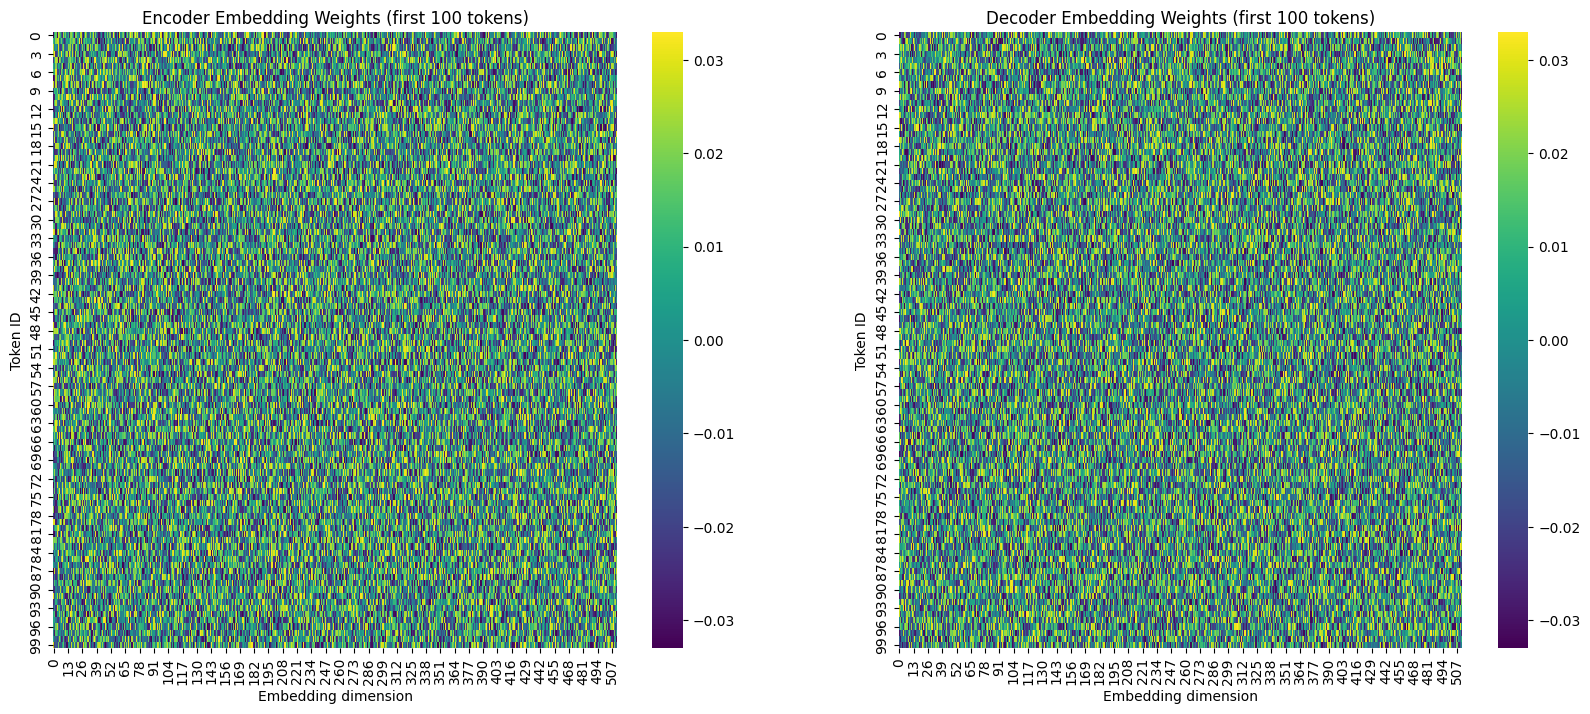

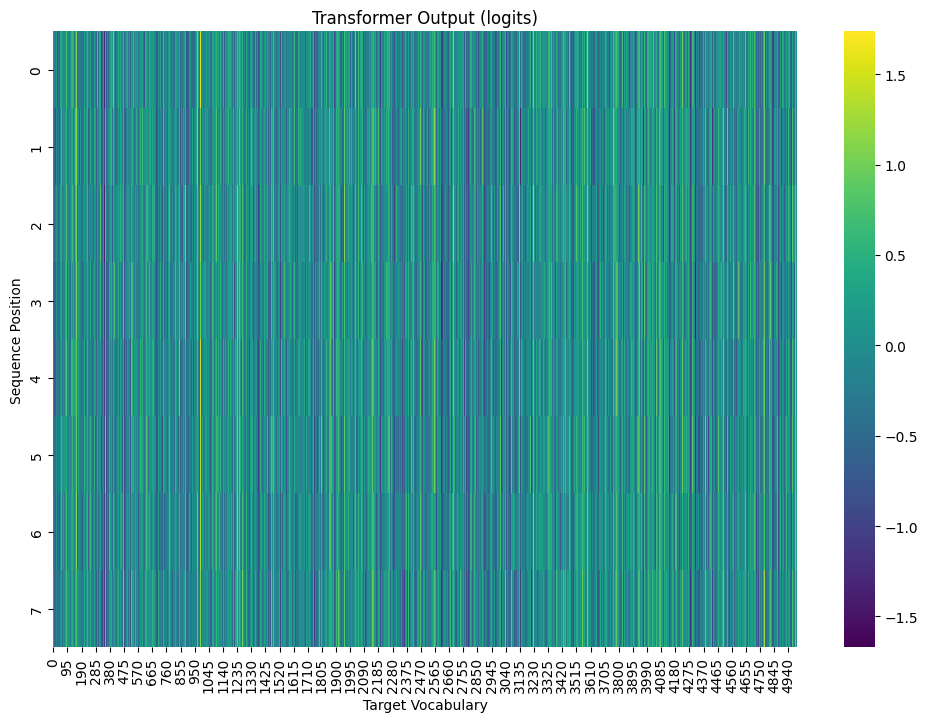

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

# これまでに実装したコンポーネントをインポートまたは再定義します
# (MultiHeadAttention, FeedForwardNetwork, EncoderLayer, DecoderLayer, PositionalEncoding)

class Encoder(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        x = self.embedding(x) * math.sqrt(self.embedding.embedding_dim)
        x = self.pos_encoding(x)
        x = self.dropout(x)
        for layer in self.layers:
            x = layer(x, mask)
        return x

class Decoder(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        x = self.embedding(x) * math.sqrt(self.embedding.embedding_dim)
        x = self.pos_encoding(x)
        print(type(x), x.shape)
        x = self.dropout(x)
        for layer in self.layers:
            x, _, _ = layer(x, enc_output, src_mask, tgt_mask)
        return x

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(src_vocab_size, d_model, num_heads, d_ff, num_layers, dropout)
        self.decoder = Decoder(tgt_vocab_size, d_model, num_heads, d_ff, num_layers, dropout)
        self.linear = nn.Linear(d_model, tgt_vocab_size)
        
    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        enc_output = self.encoder(src, src_mask)
        dec_output = self.decoder(tgt, enc_output, src_mask, tgt_mask)
        output = self.linear(dec_output)
        return output
    
    def init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

# 使用例とビジュアライゼーション
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
d_ff = 2048
num_layers = 6
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, d_ff, num_layers, dropout)
transformer.init_weights()

# サンプル入力
src = torch.randint(1, src_vocab_size, (2, 10))  # (batch_size, src_seq_len)
tgt = torch.randint(1, tgt_vocab_size, (2, 8))   # (batch_size, tgt_seq_len)

# マスクの生成
src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
tgt_mask = tgt_mask & torch.triu(torch.ones(tgt.size(1), tgt.size(1)), diagonal=1).type_as(tgt_mask.data) == 0

output = transformer(src, tgt, src_mask, tgt_mask)
print(f"入力シェイプ (src): {src.shape}")
print(f"入力シェイプ (tgt): {tgt.shape}")
print(f"出力シェイプ: {output.shape}")

# モデルの概要を表示
print(transformer)

# エンコーダとデコーダの埋め込みの可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(transformer.encoder.embedding.weight.detach().numpy()[:100], ax=ax1, cmap='viridis')
ax1.set_title('Encoder Embedding Weights (first 100 tokens)')
ax1.set_xlabel('Embedding dimension')
ax1.set_ylabel('Token ID')
sns.heatmap(transformer.decoder.embedding.weight.detach().numpy()[:100], ax=ax2, cmap='viridis')
ax2.set_title('Decoder Embedding Weights (first 100 tokens)')
ax2.set_xlabel('Embedding dimension')
ax2.set_ylabel('Token ID')
plt.show()

# 出力の可視化
plt.figure(figsize=(12, 8))
sns.heatmap(output[0].detach().numpy(), cmap='viridis')
plt.title('Transformer Output (logits)')
plt.xlabel('Target Vocabulary')
plt.ylabel('Sequence Position')
plt.show()